# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [62]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [63]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [64]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
print(clean_hospital_read_df)
clean_hospital_read_df.corr()

                                    Hospital Name  Provider Number State  \
16857                 THREE RIVERS MEDICAL CENTER           180128    KY   
14582        SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606           PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615          FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                      GREENE COUNTY HOSPITAL            10051    AL   
15625               FAIRVIEW DEVELOPMENTAL CENTER            50548    CA   
15642                  WAGONER COMMUNITY HOSPITAL           370166    OK   
15648           ST LUKE'S HOSPITAL AT THE VINTAGE           670075    TX   
15652               SOUTH TEXAS SURGICAL HOSPITAL           670061    TX   
15396              GEORGE L MEE MEMORIAL HOSPITAL            50189    CA   
14515                  JOHN H STROGER JR HOSPITAL           140124    IL   
15682                              ONECORE HEALTH           370220    OK   
14436       

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.009596,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.009596,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


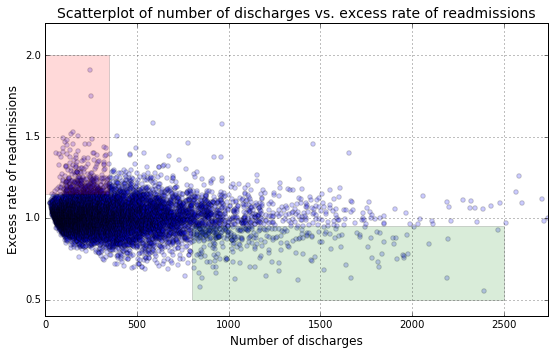

In [65]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A.    Do you agree with the above analysis and recommendations? Why or why not?


1.    The Test was not done data cleaning and wrapping. Although, the test select ['Number of Discharges'] != 'Not Available']
but there are still null values in dataset.
2.    No hypothesis test, statistic test and calculation before conclusion.  

In [67]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [68]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [69]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.3+ MB


there are null value in this data frame 

In [70]:
my_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

In [71]:
my_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 16857
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null object
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 904.5+ KB


# 1 Setup an appropriate hypothesis test.


H0: there is no significant connection between Number of Discharges and Excess Readmission Ratio

H1: there is significant connection between Number of Discharges and Excess Readmission Ratio

In [72]:
hypo=my_hospital_read_df[my_hospital_read_df['Number of Readmissions'].notnull()]

In [73]:
hypo.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [74]:
hypo.corr()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Footnote,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,NaN,0.117600,0.361033,0.330527,1.000000


due to the Number of Discharges is str , so we have to transfer it to number   

In [75]:
hypo.loc[:, 'Number of Discharges'] = hypo['Number of Discharges'].astype(int)

In [76]:
hypo.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


the correlation between Number of Discharges and Excess Readmission Ratio is -0.097398

In [77]:
r= -0.097398

In [78]:
r_square=r**2

In [79]:
r_square

0.009486370404

In [80]:
#Total number of hospitals
total_hops=len(hypo['Hospital Name'])

In [81]:
total_hops

11497

# 2.Compute and report the observed significance value (or p-value).

with 95% level of confidence, the value of alpha is 1 - 0.95 = 0.05:

In [82]:
#pearson t-statitic 
t_value=(r*((total_hops-2)/(1-r_square))**0.5)
t_value

-10.492386957113085

In [83]:
#degrees of freedom
dof=total_hops-2
import scipy.stats as stats
p_value1 = stats.t.sf(np.abs(t_value), dof)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value1

1.2224686234119185e-25

P<0.05

=> the null hypothesis is rejected. There is significant connection between Number of Discharges and Excess Readmission Ratio


# 4.Report statistical significance for α=0.01. 

it will be the same because i didnot use alpha in any equations to calculate p value

# 5.Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance that means differences observed in the sample have occurred due to sampling error. Practical significance looks at whether the difference is large enough to be of value in a practice statistical significance and practical significance. al sense.
For this problem, statistical significance and practical significance are significantly difference. Statistical significance, the correlation coefficient for number of discharges and excess readmission rate is -0.097398, which shows that number of discharges and excess readmission rate has no correlation, but r_squared (Pearson correlation coefficient squared) which is less than 1 % of variability in the excess readmission ratio, the  number of discharges can make a little change in the excess readmission ratio.
    

# 6. Look at the scatterplot above. 
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

·  What are the advantages and disadvantages of using this plot to convey information?
Advantages:
   show large quantities of data and correlation between variables and clustering effects.
Disadvantages:
    The method is not applicable to show the relation of  more than two variable
    Number of observations is limited
 
 
 
·   Construct another plot that conveys the same information in a more direct manner.
Create two groups: rate of excess readmission rate > 1 and rate of excess readmission rate < =1.
Trend line: showing the direction that number of discharges to be heading in Excess Readmission Ratio.

In [84]:
set1=hypo[hypo['Excess Readmission Ratio']<=1]
set1.shape

(5558, 12)

In [85]:
set2=hypo[hypo['Excess Readmission Ratio']>1]
set2.shape

(5939, 12)

y=-0.000029x+(1.018106)


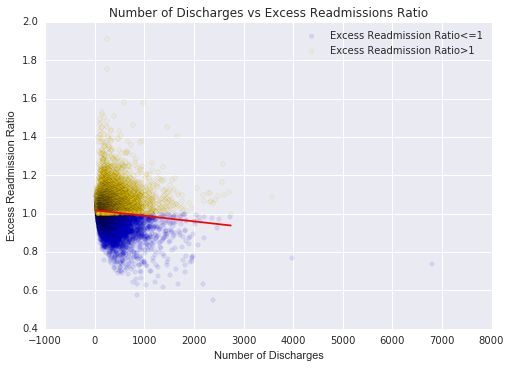

In [94]:
import seaborn as sns
plt.scatter(set1['Number of Discharges'], set1['Excess Readmission Ratio'], c='blue', label="Excess Readmission Ratio<=1", alpha=0.1)
plt.scatter(set2['Number of Discharges'], set2['Excess Readmission Ratio'], c='gold', label='Excess Readmission Ratio>1', alpha=0.1)
# calc the trendline
z = np.polyfit(hypo['Number of Discharges'],hypo['Excess Readmission Ratio'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),color='red')
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()